In [3]:
import pandas as pd                                                             
from sklearn import svm                                                        
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt                                                 
from skimage.transform import resize                                            
from skimage.io import imread
import numpy as np                                                             
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import screnshots

In [6]:
flat_data_arr=[]
target_arr=[]
categories = ['1_Reels', '2_Stories', '3_Shazam', '4_Comments']
datadir= '/home/lyumos/PycharmProjects/ig-songs-search-in-vk/screnshots'

for i in categories:
  print(f'Загрузка категории: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))                                  
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print(f'Класс:{i} Загружен успешно')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df.head()

Загрузка категории: 1_Reels
Класс:1_Reels Загружен успешно
Загрузка категории: 2_Stories
Класс:2_Stories Загружен успешно
Загрузка категории: 3_Shazam
Класс:3_Shazam Загружен успешно
Загрузка категории: 4_Comments
Класс:4_Comments Загружен успешно


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.0,0.0,0.0,0.001475,0.001475,0.001475,0.052227,0.052227,0.052227,0.090964,...,0.000002,0.000002,0.000002,5.236503e-09,5.236503e-09,5.236503e-09,8.756781e-13,8.756781e-13,8.756781e-13,0
1,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.717699,0.678483,0.639268,7.209027e-01,6.816870e-01,6.424717e-01,7.291604e-01,6.899447e-01,6.507294e-01,0
2,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.721237,0.602219,0.510284,7.210038e-01,6.020269e-01,5.099980e-01,7.207795e-01,6.021469e-01,5.104197e-01,0
3,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0
4,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.472400,0.407715,0.341661,4.706391e-01,4.063433e-01,3.430493e-01,4.690534e-01,4.047243e-01,3.419818e-01,0


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Разделен успешно')

Разделен успешно


In [8]:
param_grid={'C':[0.1,1,10],'gamma':[0.01,1],'kernel':['linear']}  
svc=svm.SVC(probability=True)                                                         
print("Обучение модели начато, пожалуйста, подождите некоторое время, так как для завершения может потребоваться несколько минут")  
model=GridSearchCV(svc, param_grid)                                                       
model.fit(x_train, y_train)                                                            
print('Модель хорошо обучена с заданными изображениями')                      
model.best_params_   

Обучение модели начато, пожалуйста, подождите некоторое время, так как для завершения может потребоваться несколько минут


/home/lyumos/PycharmProjects/Netology/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Модель хорошо обучена с заданными изображениями


{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [9]:
y_pred=model.predict(x_test)
print("Прогнозируемые данные:")
y_pred

Прогнозируемые данные:


array([0, 2, 1, 3, 0, 2, 0, 2, 2])

In [10]:
print("Фактически данные:")
np.array(y_test)

Фактически данные:


array([0, 0, 1, 3, 0, 2, 0, 2, 2])

In [11]:
print(f"Точность модели: {accuracy_score(y_pred,y_test)*100}%")

Точность модели: 88.88888888888889%


In [12]:
pickle.dump(model,open('img_model.p','wb'))
print("Успешно")

Успешно


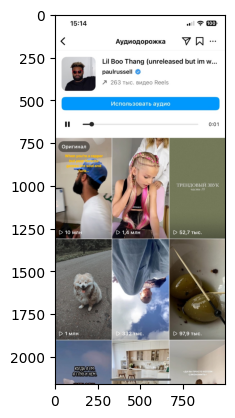

1_Reels = 87.62197804723645%
2_Stories = 3.6207237716084895%
3_Shazam = 5.9259209422662735%
4_Comments = 2.8313772388887735%
Предсказанное изображение: 1_Reels
Это изображение 1_Reels ?(y/n)


In [33]:
import time
model=pickle.load(open('img_model.p','rb'))

url=input('Введите URL-адрес изображения')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("Предсказанное изображение: "+ categories[model.predict(l)[0]])
time.sleep(2)
print(f'Это изображение {categories[model.predict(l)[0]]} ?(y/n)')
time.sleep(2)
while(True):
  b=input()
  if (b=="y" or b=="n"):
    break
  print("Введите y or n")

if (b=='n'):
  print("Что это за изображение?")
  for i in range(len(categories)):
    print(f"Введите {i} для {categories[i]}")
  time.sleep(2)
  k=int(input())
  while (k<0 or k>=len(categories)):
    print(f"Введите значение от 0-{len(categories)-1}")
    time.sleep(2)
    k=int(input())
  print("Пожалуйста, подождите некоторое время, чтобы модель извлекла уроки из этого изображения :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"Точность модели {accuracy_score(y_pred1,y_test1)*100}%")
  pickle.dump(model1,open('img_model.p','wb'))